# Patrick's Analysis

In [45]:
# import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#setting seaborn theme
sns.set_theme(style="ticks")


In [46]:
#loading data into notebook
data = pd.read_csv("./../data/raw/mxmh_survey_results.csv")
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


## Research question/interests

My research question for this project will be:

<div align = 'center'><b> Does listening to music for more hours per day result in lower reported levels of anxiety, depression, insomnia, and OCD, and does it depend on the whether an individual listens to music at work, is an instrumentalist (musician), or is a composer of music? </b></div>

To arrive at a conclusion with regards to this question, I plan to compare each observation's reported daily hours of listening with their self-reported levels of anxiety, depression, insomnia, and OCD. WHat I plan to see is either that as daily hours of listening increases, reported levels of these various mental ailments will either decrease or increase illustrating relationships between these variables. I may also explore this relationship separately for those who listen to music both while working and solely outside of work.

As my plan for this analysis, I will first clean the data by removing irrelevant columns that dont aid in answering my research question, and any rows that contain NaN on any of the columns that I do need in order the answer my research question. Columns that I currently believe to be relevant are:
- Hours per day
- While working
- Anxiety
- Depression
- Insomnia
- OCD
- Instrumentalist
- Composer

## Milestone 3 - Exploratory Data Analysis

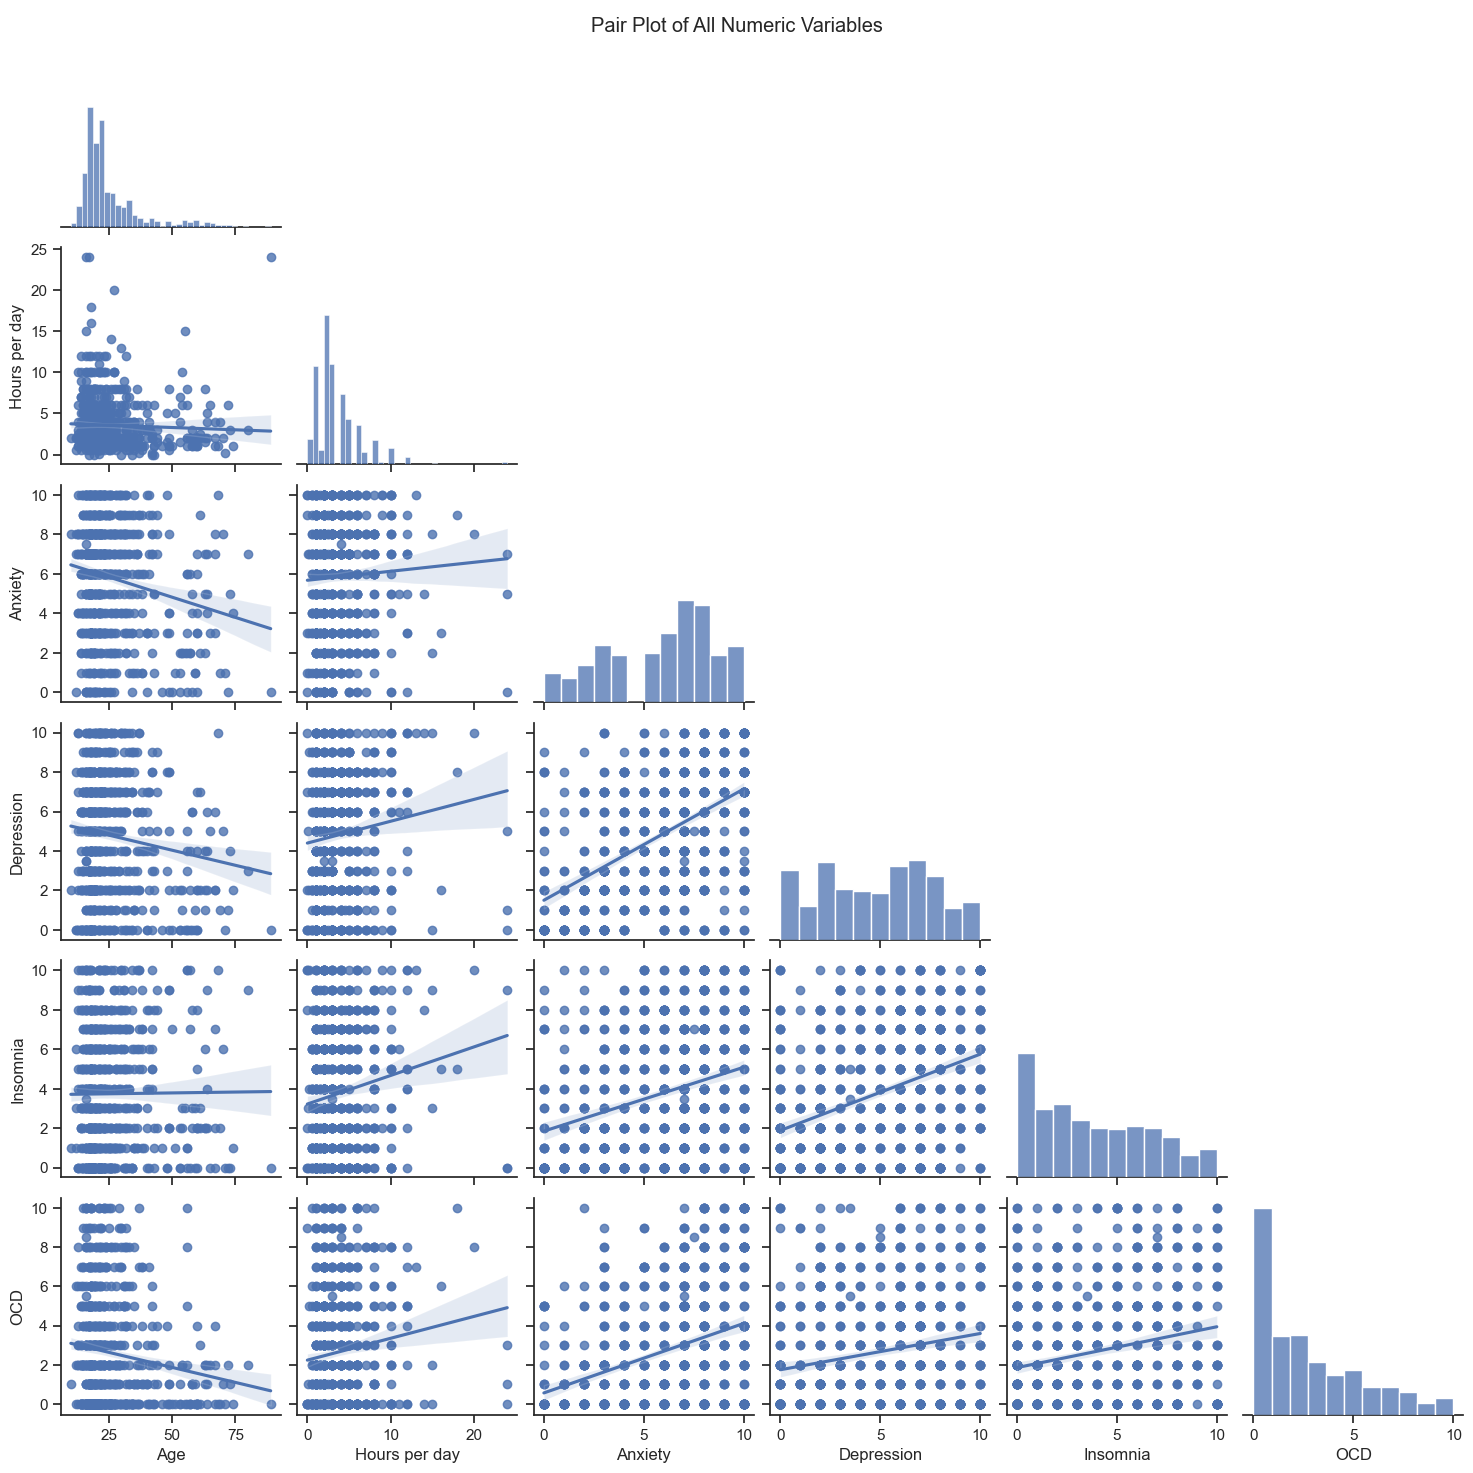

In [47]:
# imitial plot to see correlations between all numeric variables
pairPlotOfNumerics = sns.pairplot(data = data, kind = "reg", corner = True, vars = ["Age", "Hours per day", "Anxiety", "Depression", "Insomnia", "OCD"], ).fig.suptitle("Pair Plot of All Numeric Variables")

#### Commentary:
- With consideration of error and the non-linear nature of datapoints, there seems to be a positive sloping correlational relationship between Hours per day and all mental ailments
- Unrelated to music, and with the same comsiderations, there seems to also be a negative sloping correlational relationship between age and all mental ailements



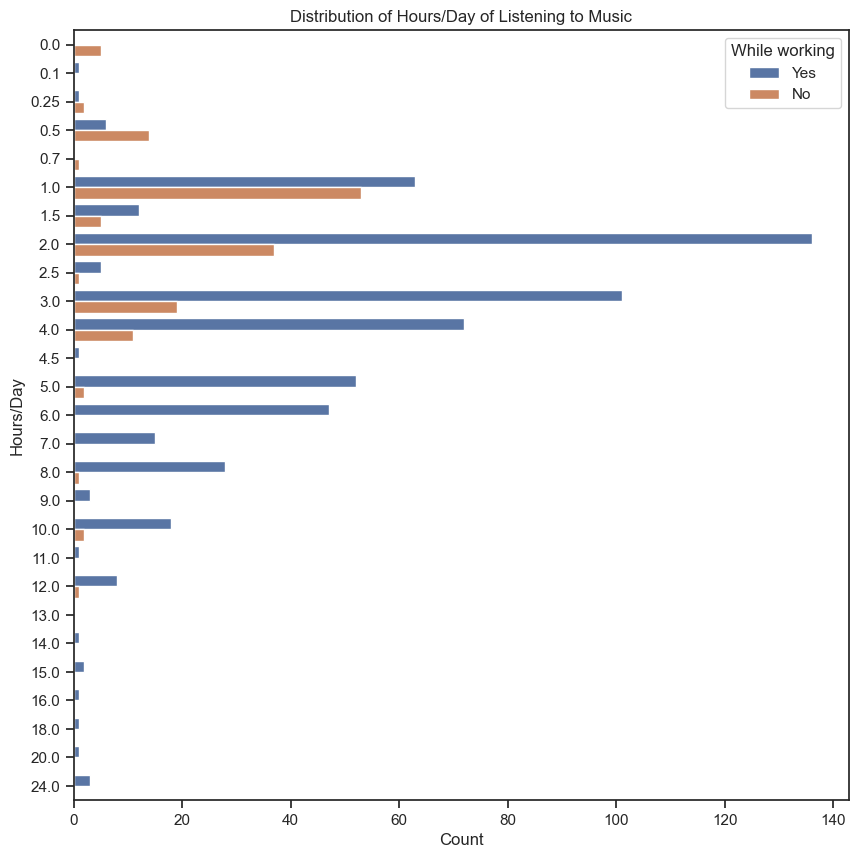

In [48]:
# count plot on Hours per day (with whether they listen while working or not)
fig, ax = plt.subplots(figsize=(10, 10))
hpdCountPlot = sns.countplot(data=data, y = "Hours per day", hue = "While working").set(title = "Distribution of Hours/Day of Listening to Music", ylabel = "Hours/Day", xlabel = "Count")

#### Commentary:
- There are some false claims of individuals who listened to music 24 hrs of the day
- The majority of individuals listen to music while working
- The majority of individuals that listen to music while working report listening to about 2 hours of music per day
- The majority of individuals that don't listen to music while working report listening to about 2 hour of music per day

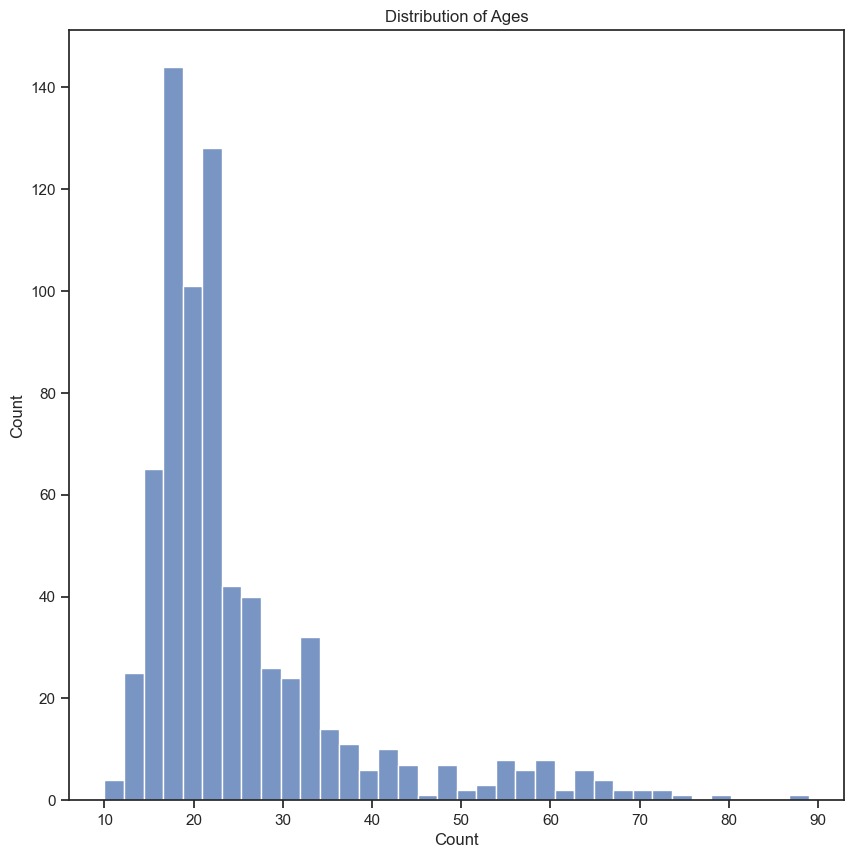

In [49]:
# count plot of Ages
fig, ax = plt.subplots(figsize=(10, 10))
ageCountPlot = sns.histplot(data = data, x = "Age").set(title = "Distribution of Ages", xlabel = "Count")

#### Commentary
- Many submissions are made by individuals who are 18 years old
- The ages of individuals in this study seem to be somewhat normally distributed and centered around 18 years old
- Potential outlier observations from individuals as old as 89 years old

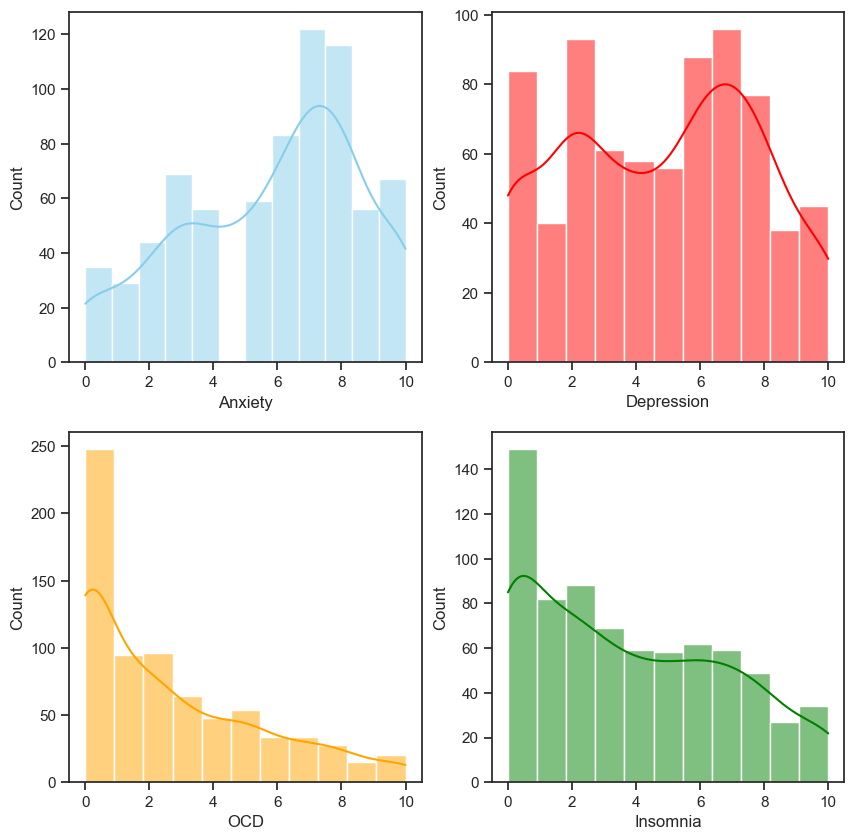

In [50]:
# Histograms of each mental ailment by self reported score
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=data, x="Anxiety", color="skyblue", label="Anxiety Level", kde=True, ax = axs[0,0])
sns.histplot(data=data, x="Depression", color="red", label="Depression", kde=True, ax = axs[0,1])
sns.histplot(data=data, x="OCD", color="orange", label="OCD", kde=True, ax = axs[1,0])
sns.histplot(data=data, x="Insomnia", color="green", label="Insomnia", kde=True, ax = axs[1,1])
plt.show()

#### Commentary
- OCD and Insomnia seem to have a majority of lower self reported scores
- Anxiety seems to somewhat normally distributed with a relatively high mean
- There was not one individual within this study that reported an amxiety level of 5

## Milestone 4 - Analysis Pipeline

In [51]:
import random
# initial data pipeline

# storing original csv
rawData = pd.read_csv("../data/raw/mxmh_survey_results.csv")
# drops unused columns
modifiedData = rawData.drop(["Primary streaming service","Fav genre","Timestamp","Age","Exploratory","Foreign languages","BPM","Frequency [Classical]","Frequency [Country]","Frequency [EDM]","Frequency [Folk]","Frequency [Gospel]","Frequency [Hip hop]","Frequency [Jazz]","Frequency [K pop]","Frequency [Latin]","Frequency [Lofi]","Frequency [Metal]","Frequency [Pop]","Frequency [R&B]","Frequency [Rap]","Frequency [Rock]","Frequency [Video game music]","Music effects","Permissions"], axis = 1)
# drop all rows with NaN values in needed columns
modifiedData = modifiedData.dropna()
# reset indices
modifiedData = modifiedData.reset_index(drop = True)
# create new column called total_score which gives a general overall mental health score to each observation
modifiedData = modifiedData.assign(total_score = modifiedData["Anxiety"] + modifiedData["OCD"] + modifiedData["Depression"] + modifiedData["Insomnia"])
# Rename columns for easier referencing
modifiedData = modifiedData.rename(columns = {"Hours per day" : "HPD"})
modifiedData = modifiedData.rename(columns = {"While working" : "WW"})
# add jitter to the Hours per Day
jitteredHPD = pd.Series()
for i in range(0,len(modifiedData["HPD"])):
    jitteredHPD.at[i] = modifiedData["HPD"][i] + (random.random() * 0.2 - 0.1)  # adds a value of [-0.1,0.1)
modifiedData = modifiedData.assign(JHPD = jitteredHPD)

modifiedData

/var/folders/pd/lb4lfwqd6g92v229s4bd2c340000gn/T/ipykernel_26972/1905181061.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jitteredHPD = pd.Series()


,HPD,WW,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,total_score,JHPD
0,3.0,Yes,Yes,Yes,3.0,0.0,1.0,0.0,4.0,2.902377
1,1.5,Yes,No,No,7.0,2.0,2.0,1.0,12.0,1.590735
2,4.0,No,No,No,7.0,7.0,10.0,2.0,26.0,3.920808
3,2.5,Yes,No,Yes,9.0,7.0,3.0,3.0,22.0,2.587867
4,4.0,Yes,No,No,7.0,2.0,5.0,9.0,23.0,3.992186
...,...,...,...,...,...,...,...,...,...,...
725,2.0,Yes,Yes,No,7.0,6.0,0.0,9.0,22.0,1.926489
726,1.0,Yes,Yes,No,3.0,2.0,2.0,5.0,12.0,0.906562
727,6.0,Yes,No,Yes,2.0,2.0,2.0,2.0,8.0,5.997636
728,5.0,Yes,Yes,No,2.0,3.0,2.0,1.0,8.0,4.942669


## Milestone 4 - Method Chaining and Writing Python Programs

In [52]:
rawData = pd.read_csv("../data/raw/mxmh_survey_results.csv")
modifiedData =\
    rawData.drop(["Primary streaming service","Fav genre","Timestamp","Age","Exploratory","Foreign languages","BPM","Frequency [Classical]","Frequency [Country]","Frequency [EDM]","Frequency [Folk]","Frequency [Gospel]","Frequency [Hip hop]","Frequency [Jazz]","Frequency [K pop]","Frequency [Latin]","Frequency [Lofi]","Frequency [Metal]","Frequency [Pop]","Frequency [R&B]","Frequency [Rap]","Frequency [Rock]","Frequency [Video game music]","Music effects","Permissions"], axis = 1)\
    .dropna().reset_index(drop = True)\
    .assign(total_score = rawData["Anxiety"] + rawData["OCD"] + rawData["Depression"] + rawData["Insomnia"])\
    .rename(columns = {"Hours per day" : "HPD"})\
    .rename(columns = {"While working" : "WW"})\

modifiedData

,HPD,WW,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,total_score
0,3.0,Yes,Yes,Yes,3.0,0.0,1.0,0.0,4.0
1,1.5,Yes,No,No,7.0,2.0,2.0,1.0,12.0
2,4.0,No,No,No,7.0,7.0,10.0,2.0,26.0
3,2.5,Yes,No,Yes,9.0,7.0,3.0,3.0,22.0
4,4.0,Yes,No,No,7.0,2.0,5.0,9.0,23.0
...,...,...,...,...,...,...,...,...,...
725,2.0,Yes,Yes,No,7.0,6.0,0.0,9.0,32.0
726,1.0,Yes,Yes,No,3.0,2.0,2.0,5.0,32.0
727,6.0,Yes,No,Yes,2.0,2.0,2.0,2.0,0.0
728,5.0,Yes,Yes,No,2.0,3.0,2.0,1.0,13.0


In [53]:
def loadAndProcess(csv):
    """Loads and processes data for this specific analysis question (analysis 1)

    Args:
        csv (str): Path to csv
    """
    
    # My method is written differently from the sample method since I wanted to drop columns before removing NaN values
    
    rawData = pd.read_csv(csv)
    modifiedData =\
        rawData.drop(["Primary streaming service","Fav genre","Timestamp","Age","Exploratory","Foreign languages","BPM","Frequency [Classical]","Frequency [Country]","Frequency [EDM]","Frequency [Folk]","Frequency [Gospel]","Frequency [Hip hop]","Frequency [Jazz]","Frequency [K pop]","Frequency [Latin]","Frequency [Lofi]","Frequency [Metal]","Frequency [Pop]","Frequency [R&B]","Frequency [Rap]","Frequency [Rock]","Frequency [Video game music]","Music effects","Permissions"], axis = 1)\
        .dropna().reset_index(drop = True)\
        .assign(total_score = rawData["Anxiety"] + rawData["OCD"] + rawData["Depression"] + rawData["Insomnia"])\
        .rename(columns = {"Hours per day" : "HPD"})\
        .rename(columns = {"While working" : "WW"})\
    # add jitter to the Hours per Day
    jitteredHPD = pd.Series()
    for i in range(0,len(modifiedData["HPD"])):
        jitteredHPD.at[i] = modifiedData["HPD"][i] + (random.random() * 0.2 - 0.1)  # adds a value of [-0.1,0.1)
    modifiedData = modifiedData.assign(JHPD = jitteredHPD)
    
    return modifiedData

modifiedData = loadAndProcess("../data/raw/mxmh_survey_results.csv")
    

/var/folders/pd/lb4lfwqd6g92v229s4bd2c340000gn/T/ipykernel_26972/1719738342.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jitteredHPD = pd.Series()


In [54]:
# Testing Function
import sys

sys.path[0] = sys.path[0] + '/code/'

import project_functions1       # loads loadAndProcess() and rAndPValue()

project_functions1.loadAndProcess("../data/raw/mxmh_survey_results.csv")


/Users/patrickma/Desktop/UBC Stuff/Year 3/DATA 301/project-group29/analysis/code/project_functions1.py:29: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jitteredHPD = pd.Series()


,PSS,HPD,WW,Instrumentalist,Composer,FG,Anxiety,Depression,Insomnia,OCD,total_score,JHPD
0,Spotify,3.0,Yes,Yes,Yes,Latin,3.0,0.0,1.0,0.0,4.0,2.980762
1,Pandora,1.5,Yes,No,No,Rock,7.0,2.0,2.0,1.0,12.0,1.412907
2,Spotify,4.0,No,No,No,Video game music,7.0,7.0,10.0,2.0,26.0,3.909496
3,YouTube Music,2.5,Yes,No,Yes,Jazz,9.0,7.0,3.0,3.0,22.0,2.419454
4,Spotify,4.0,Yes,No,No,R&B,7.0,2.0,5.0,9.0,23.0,4.026056
...,...,...,...,...,...,...,...,...,...,...,...,...
724,Spotify,2.0,Yes,Yes,No,Rock,7.0,6.0,0.0,9.0,20.0,1.925885
725,Spotify,1.0,Yes,Yes,No,Pop,3.0,2.0,2.0,5.0,32.0,1.091396
726,Other streaming service,6.0,Yes,No,Yes,Rap,2.0,2.0,2.0,2.0,32.0,5.921420
727,Spotify,5.0,Yes,Yes,No,Classical,2.0,3.0,2.0,1.0,0.0,5.021203


## Milestone 4 - Analysis for Research Question

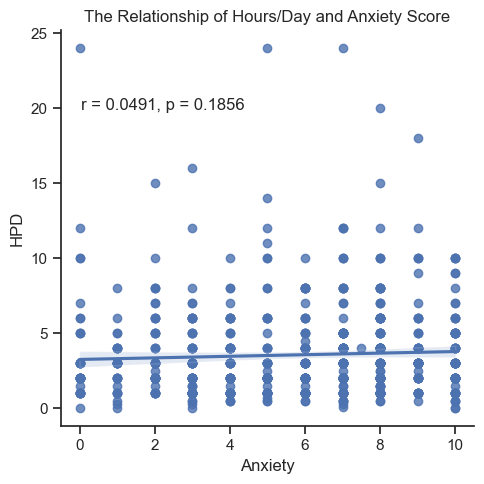

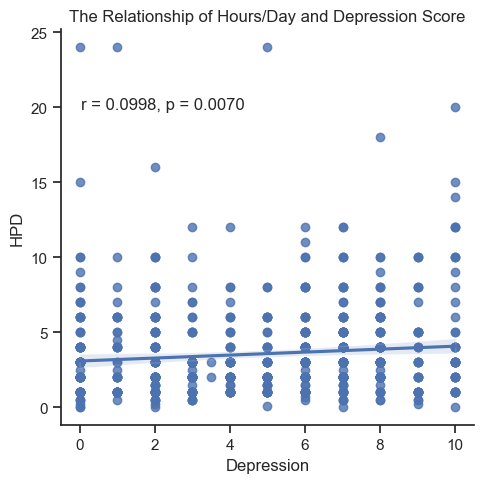

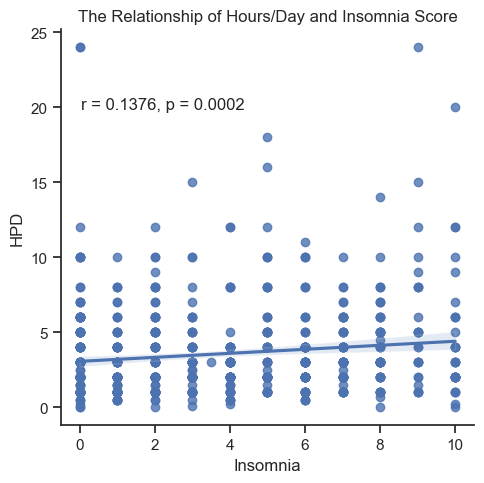

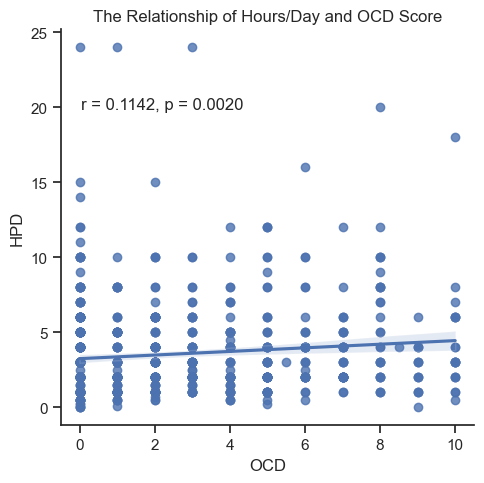

In [55]:
# simple scatterplots to see potential relationships between original self reported ratings of aspects mental health and the self reported number
# of hours of daily music listening

baseAnxPlot = sns.lmplot(data = modifiedData, y = "HPD", x = "Anxiety").set(title = "The Relationship of Hours/Day and Anxiety Score", ylabel = "Hours/Day")
baseAnxPlot.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Anxiety')

baseDepPlot = sns.lmplot(data = modifiedData, y= "HPD", x = "Depression").set(title = "The Relationship of Hours/Day and Depression Score", ylabel = "Hours/Day")
baseDepPlot.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Depression')

baseInsPlot = sns.lmplot(data = modifiedData, y= "HPD", x = "Insomnia").set(title = "The Relationship of Hours/Day and Insomnia Score", ylabel = "Hours/Day")
baseInsPlot.map_dataframe(project_functions1.rAndPValue, y = "HPD", x = 'Insomnia')

baseOCDPlot = sns.lmplot(data = modifiedData, y= "HPD", x = "OCD").set(title = "The Relationship of Hours/Day and OCD Score", ylabel = "Hours/Day")
baseOCDPlot.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'OCD')

#### Observations:
- Taking the assumption that we want a p-value below 0.05 from the F-test to be able to represent statistical evidence against the null hypothesis in favour of the alternative (that there is a correlational linear relationship):
    - We can conclude that there likely isn't a correlationally linear relationship between Hours per day and Anxiety
    - However, we can conclude that there is likely sone correlationally linear relationship between Hours per day and Depression
    - We can conclude that there is likely some correlationally linear relationship between Hours per day and Insomnia
    - And we can conclude that there is likely sone correlationally linear relationship between Hours per day and OCD
 - In all cases where there seems to be some correlationally linear relationship, there seems to be a positive trend in that the more daily hours of music listened by subjects of this study, the higher they rated their various scores of mental health ailments, showing signs that the more hours of music one listens to per day, the more severe their experiences of Depression, Insomnia, and OCD

#### Narrative
Through these initial plots, I have found that with regards to all individuals within this study, there seems to be a weakly positive correlational relationship between the numbers of hours per day of listning time and OCD, Insomnia, and Depression, but not Anxiety. This is to say that there seems to be a somewhat apparent relation in that the more hours of music one listens to, the higher they're self perceived levels of OCD, Insomnia, and Depression.

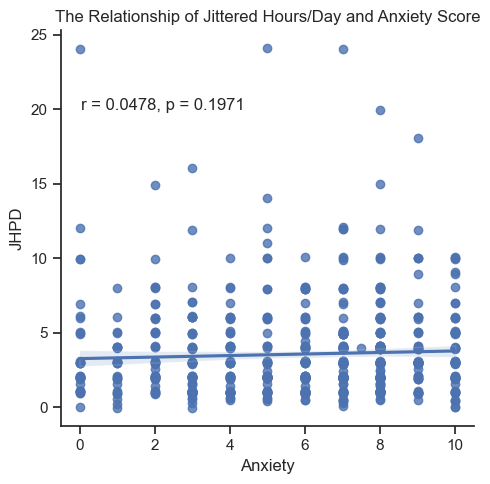

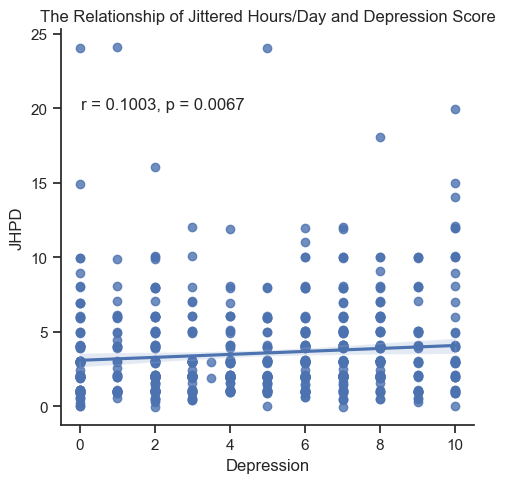

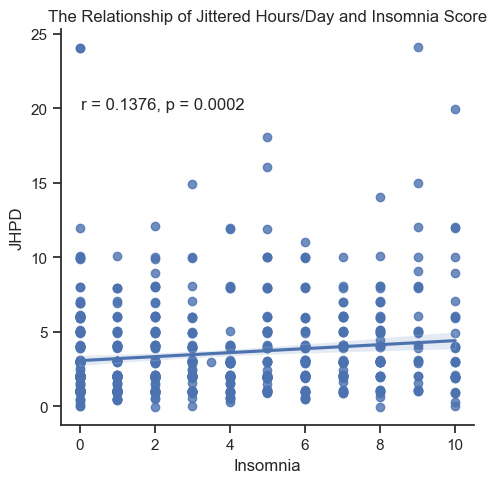

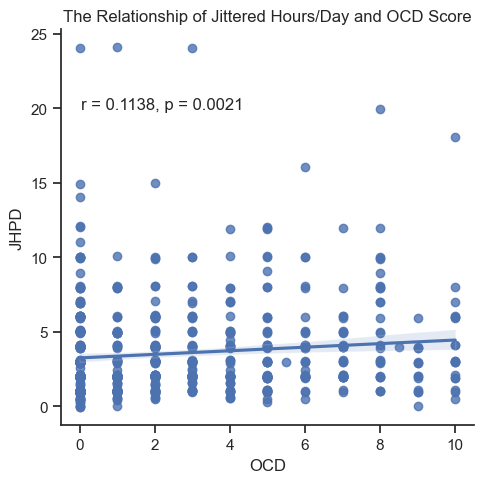

In [56]:
# simple scatterplots to see the potential relationships between jittered hours per day and all self-reported scores of mental health afflictions

jitteredAnxPlot = sns.lmplot(data = modifiedData, y = "JHPD", x = "Anxiety").set(title = "The Relationship of Jittered Hours/Day and Anxiety Score", ylabel = "Jittered Hours/Day")
jitteredAnxPlot.map_dataframe(project_functions1.rAndPValue, y = 'JHPD', x = 'Anxiety')

jitteredDepPlot = sns.lmplot(data = modifiedData, y= "JHPD", x = "Depression").set(title = "The Relationship of Jittered Hours/Day and Depression Score", ylabel = "Jittered Hours/Day")
jitteredDepPlot.map_dataframe(project_functions1.rAndPValue, y = 'JHPD', x = 'Depression')

jitteredInsPlot = sns.lmplot(data = modifiedData, y= "JHPD", x = "Insomnia").set(title = "The Relationship of Jittered Hours/Day and Insomnia Score", ylabel = "Jittered Hours/Day")
jitteredInsPlot.map_dataframe(project_functions1.rAndPValue, y = 'JHPD', x = 'Insomnia')

jitteredOCDPlot = sns.lmplot(data = modifiedData, y= "JHPD", x = "OCD").set(title = "The Relationship of Jittered Hours/Day and OCD Score", ylabel = "Jittered Hours/Day")
jitteredOCDPlot.map_dataframe(project_functions1.rAndPValue, y = 'JHPD', x = 'OCD')

#### Observations
- There does not seem to be much difference in correlation coefficients and p-values despite the use of jittered hours per day.
- Taking the assumption that we want a p-value below 0.05 from the F-test to be able to represent statistical evidence against the null hypothesis in favour of the alternative (that there is a correlational linear relationship):
    - There still seems to be no apparent relationship between the jittered hours per day of music listening, and Anxiety.
    - There also still seems to be a weakly linear correlational relationship between jittered hours per day of music listening, and OCD, Insomnia, and Depression.

#### Narrative
I created these plots to see if there would be a change in result by jittering the hours per day a little since most observations were by the hour. In real-life, this is not entirely accurate as no one listens to exactly an integer value of hours of music per day. I thus introduced jitter to simulate a more real set of continuous data for the hours per day of music listening time. There did not seem to be much of a change in results. Perhaps I could introduce more jitter, however, I fear skewing the data too far from what is actually represented in the dataset. Thus, I will jitter the data no further.

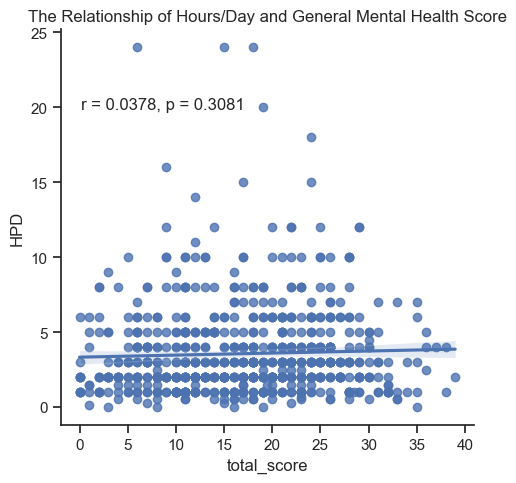

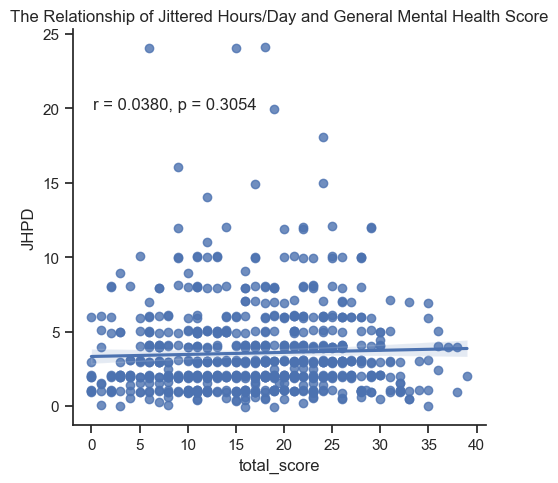

In [57]:
# simple scatterplots to see potential relationships between hours per day and a general metric for mental health (a summation of all mental health statistics)

total_scorePlot1 = sns.lmplot(data = modifiedData, y = "HPD", x = "total_score").set(title = "The Relationship of Hours/Day and General Mental Health Score", ylabel = "HPD", xlabel = "General Score (Lower is Better Generally)")
total_scorePlot1.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'total_score')

# with the jitter
total_scorePlot2 = sns.lmplot(data = modifiedData, y= "JHPD", x = "total_score").set(title = "The Relationship of Jittered Hours/Day and General Mental Health Score", ylabel = "Hours/Day", xlabel = "General Score (Lower is Better Generally)")
total_scorePlot2.map_dataframe(project_functions1.rAndPValue, y = 'JHPD', x = 'total_score')

#### Observations
- Taking the assumption that we want a p-value below 0.05 from the F-test to be able to represent statistical evidence against the null hypothesis in favour of the alternative (that there is a correlational linear relationship):
    - There seems to be no correlationally linear relationship between the hours of music listened to per day and the summation of mental health afflictions
    - There also seems to be no correlationally linear relationship between the jittered hours of music listened to per day and the summation of mental health afflictions. In other words, the slight jitter meant to help simulate a more accurate continuous report of individuals' hours per day of listening as not helped reveal an underlying relationship here.

#### Narrative
I made these plots to also see if there was some underlying relationship with all mental ailments being considered. I was also thinking of doing a multivariate linear regression however that would be a multi dimensional plot which I think is outside the context of this course. Through just the summary "total_score" column I made that sums all the scores of mental ailments, there does not seem to be any inherent relationship between music and mental health, but as I had gathered from the previous set of plots, there does seem to be a correlationally linear relationship between hours of listening per day and OCD, Insomnia, and Depression, albeit a weak one. Because the p-value is so high, there is likely no relationship even if I were to take a subset of observations dependent on streaming services, whether they are a composer or not, etc. I will thus, no longer be using this "total_score" statistic for any of my further plots.

Text(0.5, 1.0, 'Not While Working')

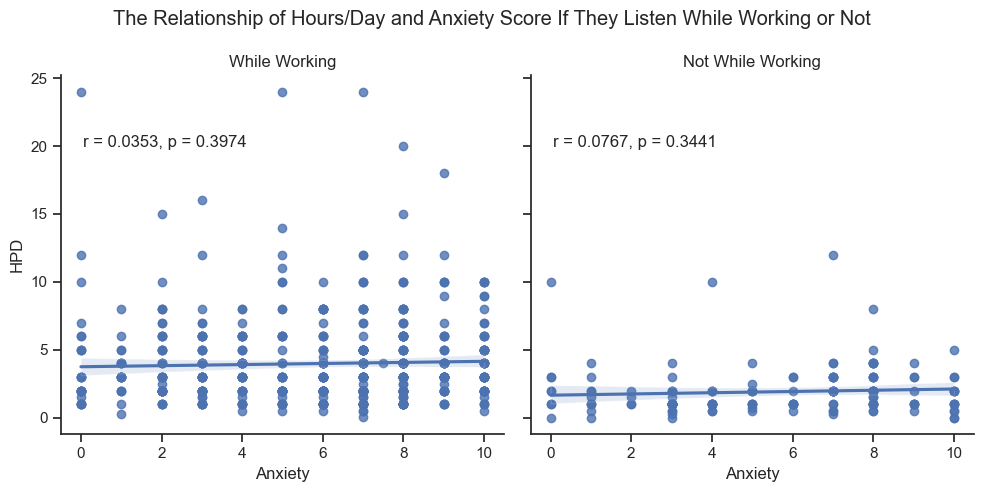

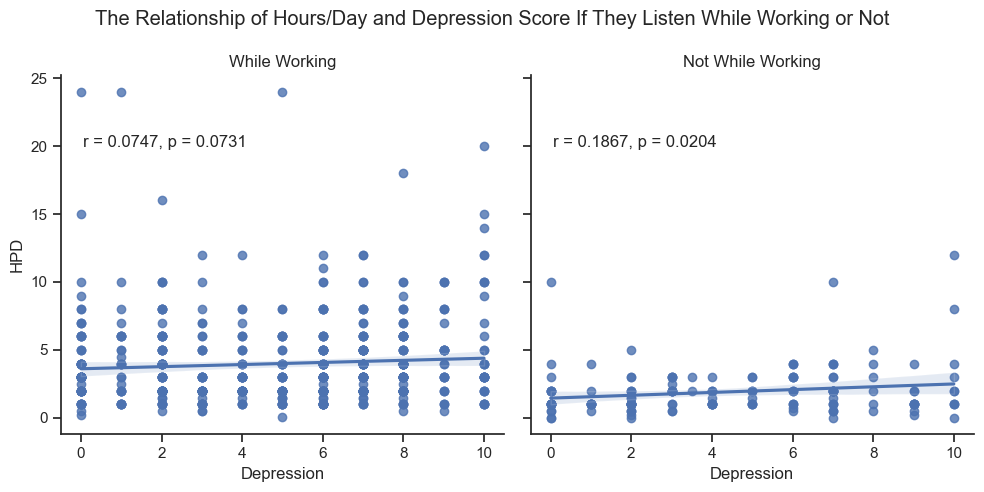

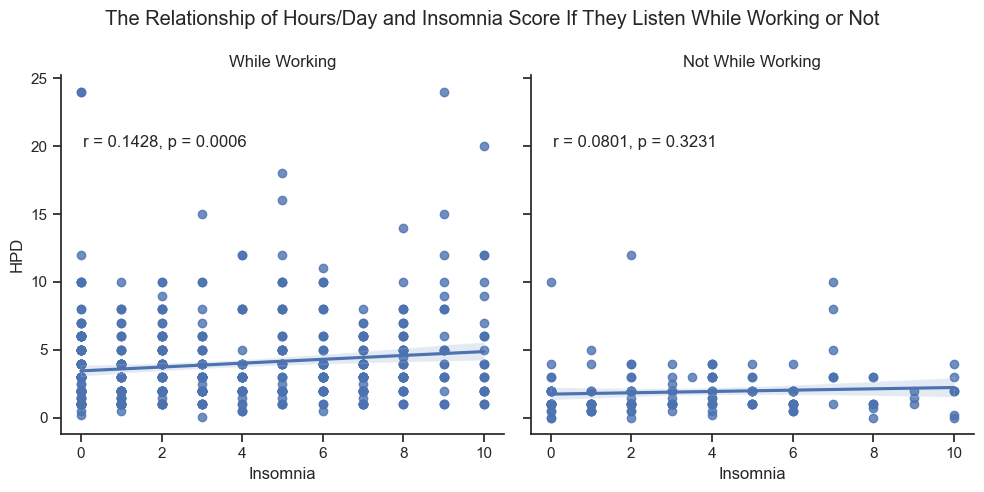

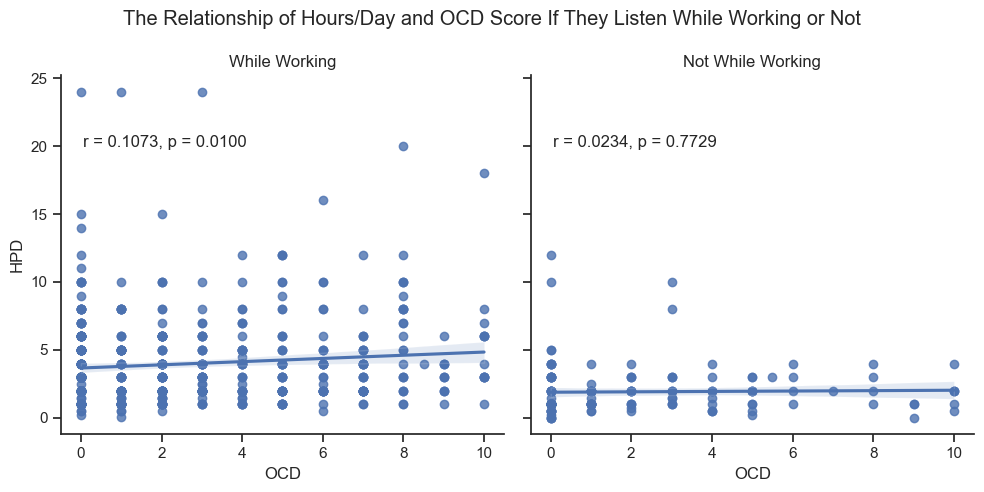

In [58]:
## plots for if they are listening to music while working

atWorkPlot1 = sns.lmplot(data = modifiedData, y = "HPD", x = "Anxiety", col = "WW").set(ylabel = "Hours/Day")
atWorkPlot1.fig.suptitle("The Relationship of Hours/Day and Anxiety Score If They Listen While Working or Not")
atWorkPlot1.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Anxiety')
axes = atWorkPlot1.axes.flatten(); axes[0].set_title("While Working"); axes[1].set_title("Not While Working")
atWorkPlot2 = sns.lmplot(data = modifiedData, y = "HPD", x = "Depression", col = "WW").set(ylabel = "Hours/Day")
atWorkPlot2.fig.suptitle("The Relationship of Hours/Day and Depression Score If They Listen While Working or Not")
atWorkPlot2.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Depression')
axes = atWorkPlot2.axes.flatten(); axes[0].set_title("While Working"); axes[1].set_title("Not While Working")
atWorkPlot3 = sns.lmplot(data = modifiedData, y = "HPD", x = "Insomnia", col = "WW").set(ylabel = "Hours/Day")
atWorkPlot3.fig.suptitle("The Relationship of Hours/Day and Insomnia Score If They Listen While Working or Not")
atWorkPlot3.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Insomnia')
axes = atWorkPlot3.axes.flatten(); axes[0].set_title("While Working"); axes[1].set_title("Not While Working")
atWorkPlot4 = sns.lmplot(data = modifiedData, y = "HPD", x = "OCD", col = "WW").set(ylabel = "Hours/Day")
atWorkPlot4.fig.suptitle("The Relationship of Hours/Day and OCD Score If They Listen While Working or Not")
atWorkPlot4.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'OCD')
axes = atWorkPlot4.axes.flatten(); axes[0].set_title("While Working"); axes[1].set_title("Not While Working")


#### Observations
- Taking the assumption that we want a p-value below 0.05 from the F-test to be able to represent statistical evidence against the null hypothesis in favour of the alternative (that there is a correlational linear relationship):

#### Narrative

Text(0.5, 1.0, 'Are Not Instrumentalists')

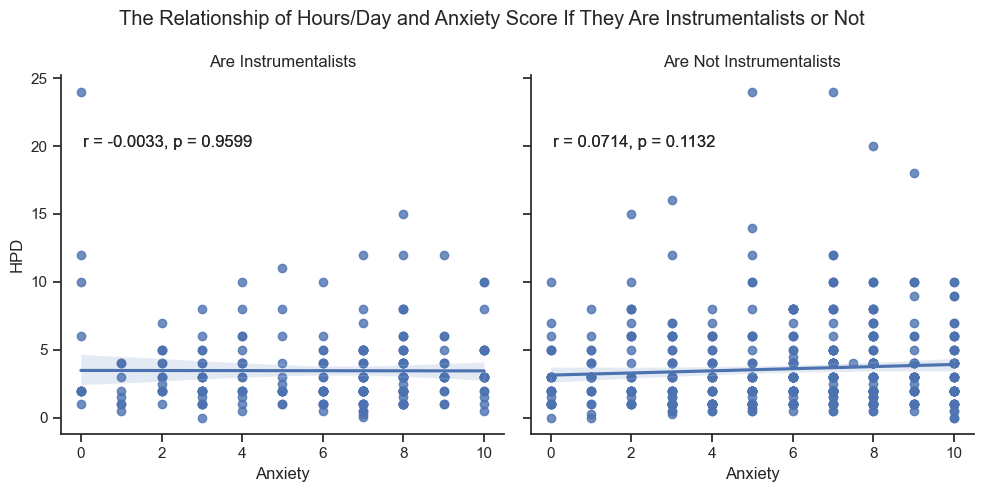

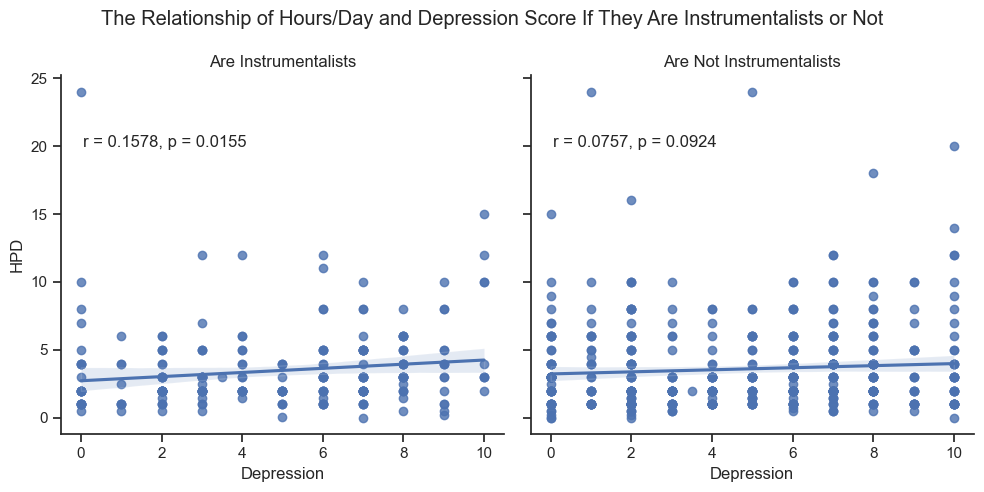

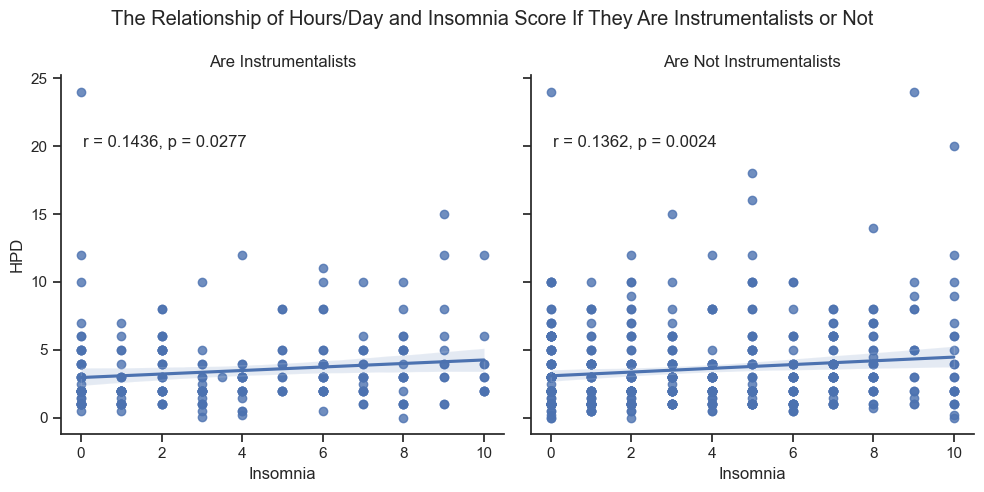

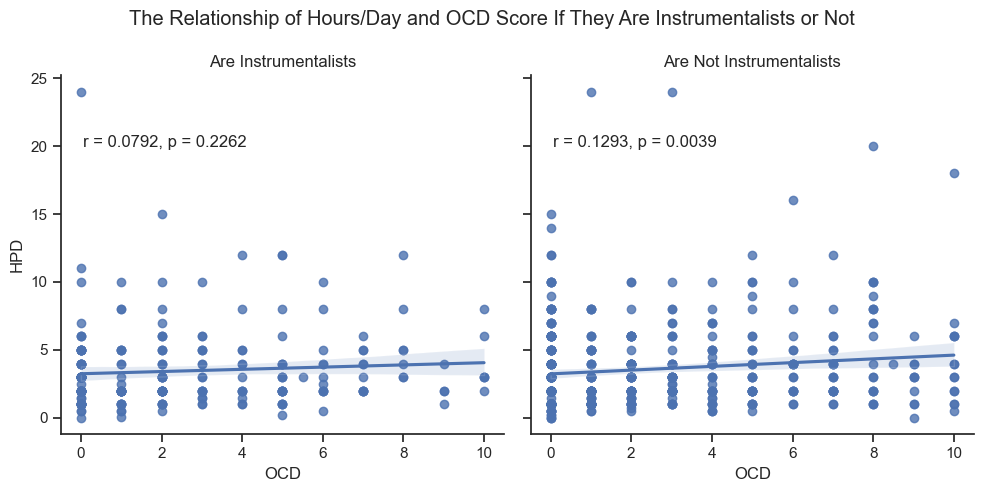

In [59]:
## plots for if they are also musicians (instrumentalists)
ComposerPlot1 = sns.lmplot(data = modifiedData, y = "HPD", x = "Anxiety", col = "Instrumentalist").set(ylabel = "Hours/Day")
InstrumentalistPlot1.fig.suptitle("The Relationship of Hours/Day and Anxiety Score If They Are Instrumentalists or Not")
InstrumentalistPlot1.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Anxiety')
axes = InstrumentalistPlot1.axes.flatten(); axes[0].set_title("Are Instrumentalists"); axes[1].set_title("Are Not Instrumentalists")
InstrumentalistPlot2 = sns.lmplot(data = modifiedData, y = "HPD", x = "Depression", col = "Instrumentalist").set(ylabel = "Hours/Day")
InstrumentalistPlot2.fig.suptitle("The Relationship of Hours/Day and Depression Score If They Are Instrumentalists or Not")
InstrumentalistPlot2.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Depression')
axes = InstrumentalistPlot2.axes.flatten(); axes[0].set_title("Are Instrumentalists"); axes[1].set_title("Are Not Instrumentalists")
InstrumentalistPlot3 = sns.lmplot(data = modifiedData, y = "HPD", x = "Insomnia", col = "Instrumentalist").set(ylabel = "Hours/Day")
InstrumentalistPlot3.fig.suptitle("The Relationship of Hours/Day and Insomnia Score If They Are Instrumentalists or Not")
InstrumentalistPlot3.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Insomnia')
axes = InstrumentalistPlot3.axes.flatten(); axes[0].set_title("Are Instrumentalists"); axes[1].set_title("Are Not Instrumentalists")
InstrumentalistPlot4 = sns.lmplot(data = modifiedData, y = "HPD", x = "OCD", col = "Instrumentalist").set(ylabel = "Hours/Day")
InstrumentalistPlot4.fig.suptitle("The Relationship of Hours/Day and OCD Score If They Are Instrumentalists or Not")
InstrumentalistPlot4.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'OCD')
axes = InstrumentalistPlot4.axes.flatten(); axes[0].set_title("Are Instrumentalists"); axes[1].set_title("Are Not Instrumentalists")

#### Observations
- 

#### Narrative

Text(0.5, 1.0, 'Are Not Composers')

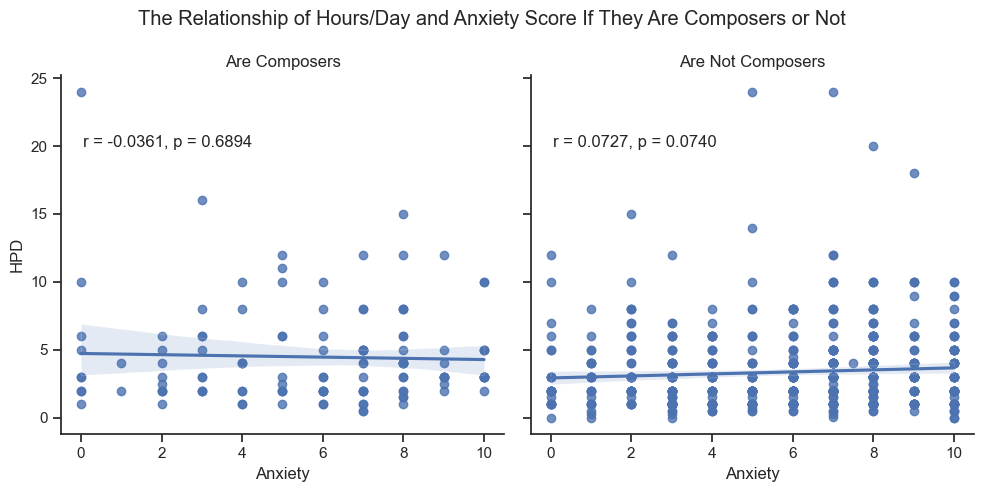

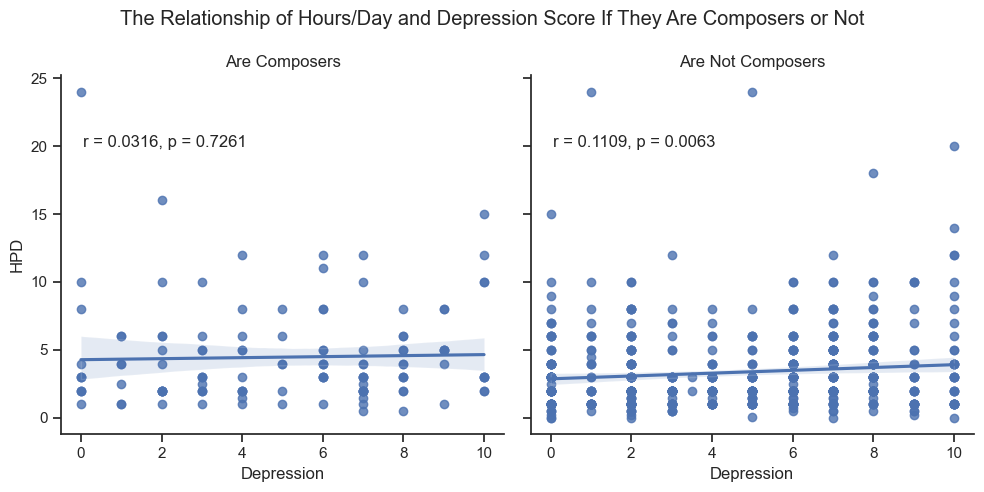

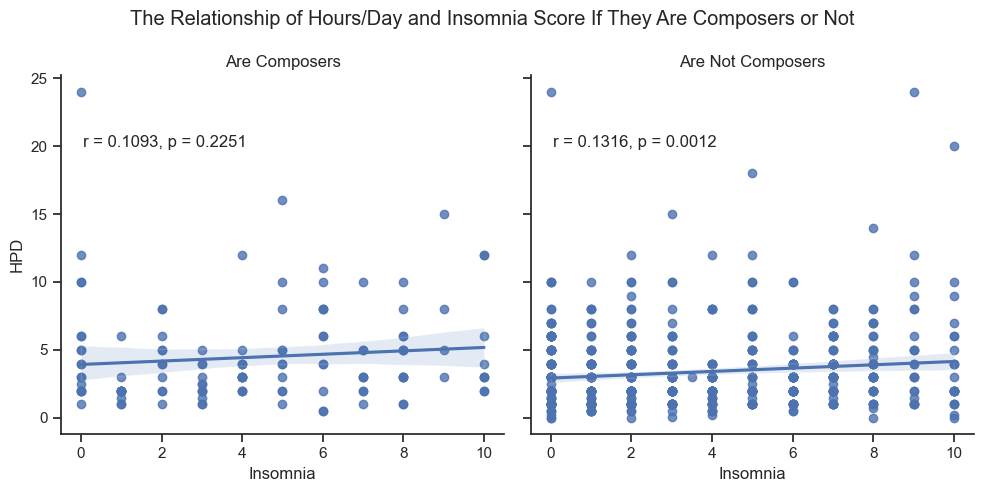

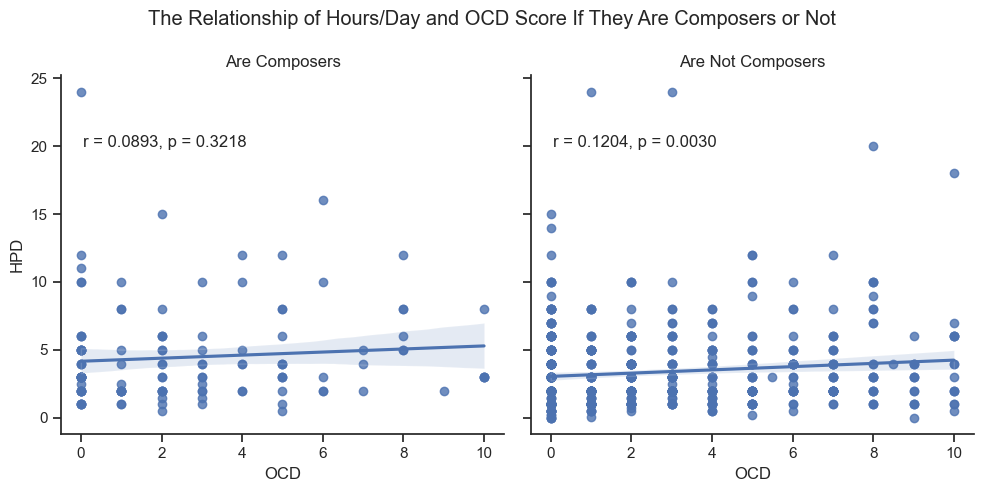

In [60]:
## plots for if they are also composers
ComposerPlot1 = sns.lmplot(data = modifiedData, y = "HPD", x = "Anxiety", col = "Composer").set(ylabel = "Hours/Day")
ComposerPlot1.fig.suptitle("The Relationship of Hours/Day and Anxiety Score If They Are Composers or Not")
ComposerPlot1.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Anxiety')
axes = ComposerPlot1.axes.flatten(); axes[0].set_title("Are Composers"); axes[1].set_title("Are Not Composers")
ComposerPlot2 = sns.lmplot(data = modifiedData, y = "HPD", x = "Depression", col = "Composer").set(ylabel = "Hours/Day")
ComposerPlot2.fig.suptitle("The Relationship of Hours/Day and Depression Score If They Are Composers or Not")
ComposerPlot2.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Depression')
axes = ComposerPlot2.axes.flatten(); axes[0].set_title("Are Composers"); axes[1].set_title("Are Not Composers")
ComposerPlot3 = sns.lmplot(data = modifiedData, y = "HPD", x = "Insomnia", col = "Composer").set(ylabel = "Hours/Day")
ComposerPlot3.fig.suptitle("The Relationship of Hours/Day and Insomnia Score If They Are Composers or Not")
ComposerPlot3.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'Insomnia')
axes = ComposerPlot3.axes.flatten(); axes[0].set_title("Are Composers"); axes[1].set_title("Are Not Composers")
ComposerPlot4 = sns.lmplot(data = modifiedData, y = "HPD", x = "OCD", col = "Composer").set(ylabel = "Hours/Day")
ComposerPlot4.fig.suptitle("The Relationship of Hours/Day and OCD Score If They Are Composers or Not")
ComposerPlot4.map_dataframe(project_functions1.rAndPValue, y = 'HPD', x = 'OCD')
axes = ComposerPlot4.axes.flatten(); axes[0].set_title("Are Composers"); axes[1].set_title("Are Not Composers")

#### Observations
- 

#### Narrative